#### (1)문제정의

- 분석 방법별로 신경망을 설계해서 학습을 싴보자
- 회귀분석
- 이진분류(원핫인코딩 하지 않은 데이터)
- 이진분류(원핫인코딩 항 데이터)
- 다진분류

#### 이진분류(원핫인코딩 하지 않은 데이터)

In [1]:
import pandas as pd
data = pd.read_csv("./Untitled Folder/ThoraricSurgery.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


#### 탐색적 데이터 분석

In [2]:
#결측지 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       470 non-null    int64  
 1   1       470 non-null    int64  
 2   2       470 non-null    float64
 3   3       470 non-null    float64
 4   4       470 non-null    int64  
 5   5       470 non-null    int64  
 6   6       470 non-null    int64  
 7   7       470 non-null    int64  
 8   8       470 non-null    int64  
 9   9       470 non-null    int64  
 10  10      470 non-null    int64  
 11  11      470 non-null    int64  
 12  12      470 non-null    int64  
 13  13      470 non-null    int64  
 14  14      470 non-null    int64  
 15  15      470 non-null    int64  
 16  16      470 non-null    int64  
 17  17      470 non-null    int64  
dtypes: float64(2), int64(16)
memory usage: 66.2 KB


In [3]:
#기술적 통계보기
#편향여부확인가능, 이상치 확인,데이터가 흩어진 정도(분산)
data.describe()

#이상치 확인 : 삭제, 수정 - 수학적 도구(통계, 평균, 충앙) - 그룹핑(binning)
#데이터가 흩어진 정도 : 스케일링

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.095745,3.281638,4.568702,0.780851,0.065957,0.144681,0.065957,0.687234,0.165957,11.736170,0.074468,0.004255,0.017021,0.821277,0.004255,62.534043,0.148936
std,135.821574,0.722309,0.871395,11.767857,0.535375,0.248472,0.352154,0.248472,0.464114,0.372439,0.702243,0.262811,0.065163,0.129488,0.383529,0.065163,8.706902,0.356405
min,1.000000,1.000000,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,118.250000,3.000000,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,235.500000,3.000000,3.160000,2.400000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,352.750000,3.000000,3.807500,3.080000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,470.000000,8.000000,6.300000,86.300000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [4]:
data.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.000000,-0.007878,-0.034985,0.029563,-0.021449,0.052724,0.027238,-0.061885,0.008845,0.027271,0.047079,-0.009229,-0.016382,-0.015761,-0.038681,-0.042400,-0.005826,-0.074924
1,-0.007878,1.000000,0.121263,0.058780,-0.055900,0.047900,-0.062958,-0.047142,-0.075850,-0.019562,-0.135050,0.029753,-0.008675,-0.017461,-0.107427,-0.008675,0.076271,0.060444
2,-0.034985,0.121263,1.000000,0.032975,-0.091094,0.019786,-0.095827,0.055829,-0.052770,-0.100242,0.034088,-0.115145,-0.009135,-0.035584,-0.012009,-0.060578,-0.290178,-0.046374
3,0.029563,0.058780,0.032975,1.000000,-0.143155,0.161615,0.102979,0.260073,-0.099914,-0.086103,0.015504,-0.022251,-0.013617,-0.025088,-0.100853,-0.016509,-0.115900,-0.042841
4,-0.021449,-0.055900,-0.091094,-0.143155,1.000000,0.092863,0.123296,0.092863,0.684647,0.418042,0.089751,0.025310,0.026788,0.023166,0.172289,-0.034330,0.214528,0.093200
5,0.052724,0.047900,0.019786,0.161615,0.092863,1.000000,0.256225,0.067529,-0.024115,-0.072455,0.099942,0.022578,-0.017372,-0.034968,-0.077406,-0.017372,0.044789,0.057375
6,0.027238,-0.062958,-0.095827,0.102979,0.123296,0.256225,1.000000,0.134386,0.081772,0.060393,0.059840,-0.001471,-0.026886,0.086156,-0.044942,-0.026886,0.086705,0.065785
7,-0.061885,-0.047142,0.055829,0.260073,0.092863,0.067529,0.134386,1.000000,0.049843,-0.072455,0.075502,-0.042725,-0.017372,0.097572,-0.077406,-0.017372,-0.015331,0.105530
8,0.008845,-0.075850,-0.052770,-0.099914,0.684647,-0.024115,0.081772,0.049843,1.000000,0.202245,0.145345,0.016551,0.044101,0.017815,0.200373,-0.026401,0.149589,0.088860
9,0.027271,-0.019562,-0.100242,-0.086103,0.418042,-0.072455,0.060393,-0.072455,0.202245,1.000000,-0.036044,0.069522,0.058695,0.029726,0.118527,-0.029161,0.208003,0.086467


In [5]:
#특성데이터와 라벨테이터로 분리

In [6]:
X = data.iloc[:,:17]
y = data.iloc[:,17]

X.shape, y.shape

((470, 17), (470,))

In [7]:
#신경망 설계

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()
#입력층
#X.shape[1] : 특성데이터의 개수 ->17
model1.add(Dense(units=34, input_dim=X.shape[1], activation="sigmoid"))
#은닉층
model1.add(Dense(units=17, activation="sigmoid"))
#출력층
#회귀 : units=1 ->activation="linear" 또는 삭제
#이진분류(원핫x): units=1 -> activation ='sigmoid'
#이진분류(원핫ㅇ): units=2 -> activation='softmax'
#n진분류 : units=n -> activation='softmax'
model1.add(Dense(units=1, activation="sigmoid"))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 34)                612       
_________________________________________________________________
dense_1 (Dense)              (None, 17)                595       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 18        
Total params: 1,225
Trainable params: 1,225
Non-trainable params: 0
_________________________________________________________________


In [9]:
model1.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [10]:
model1.fit(X,y, epochs=30, batch_size=20, validation_split=0.3)

Train on 329 samples, validate on 141 samples
Epoch 1/30
329/329 [==============================] - 1s 2ms/sample - loss: 0.5068 - accuracy: 0.8419 - val_loss: 0.4412 - val_accuracy: 0.8723
Epoch 2/30
329/329 [==============================] - 0s 110us/sample - loss: 0.4604 - accuracy: 0.8419 - val_loss: 0.4056 - val_accuracy: 0.8723
Epoch 3/30
329/329 [==============================] - 0s 107us/sample - loss: 0.4419 - accuracy: 0.8419 - val_loss: 0.3916 - val_accuracy: 0.8723
Epoch 4/30
329/329 [==============================] - 0s 107us/sample - loss: 0.4373 - accuracy: 0.8419 - val_loss: 0.3885 - val_accuracy: 0.8723
Epoch 5/30
329/329 [==============================] - 0s 110us/sample - loss: 0.4375 - accuracy: 0.8419 - val_loss: 0.3849 - val_accuracy: 0.8723
Epoch 6/30
329/329 [==============================] - 0s 107us/sample - loss: 0.4350 - accuracy: 0.8419 - val_loss: 0.3863 - val_accuracy: 0.8723
Epoch 7/30
329/329 [==============================] - 0s 110us/sample - loss: 0.

In [11]:
#평가

In [12]:
model1.evaluate(X,y)

470/470 [==============================] - 0s 35us/sample - loss: 0.4219 - accuracy: 0.8511


[0.4219349371626022, 0.85106385]

In [13]:
pred = model1.predict(X)
for i in range(10) : 
    print("실제값 : {}, 예측값 : {}".format(y[i], pred[i]))  # format은 중괄호

실제값 : 0, 예측값 : [0.16938947]
실제값 : 0, 예측값 : [0.20927839]
실제값 : 1, 예측값 : [0.22684598]
실제값 : 1, 예측값 : [0.23158461]
실제값 : 0, 예측값 : [0.18267147]
실제값 : 0, 예측값 : [0.185148]
실제값 : 0, 예측값 : [0.17315552]
실제값 : 1, 예측값 : [0.16316885]
실제값 : 0, 예측값 : [0.13820429]
실제값 : 0, 예측값 : [0.13703957]


In [14]:
# 주피터 실행할때 꼬옥 deep01 환경으로 실행해주세요 감사합니다

#### y를 원핫인코딩ㅇ해서 이진분류

In [15]:
y_en = pd.get_dummies(y)
X.shape, y_en.shape

((470, 17), (470, 2))

In [16]:
model2 = Sequential()
model2.add(Dense(units=34, input_dim=17, activation="relu"))

model2.add(Dense(units=17, activation="relu"))

#원핫인코딩 했다면 출력층의 파라미터 수정
model2.add(Dense(units=2, activation="softmax"))

In [17]:
model2.compile(loss="binary_crossentropy",
               optimizer="adam",
              metrics=["accuracy"])

In [18]:
#y는 원핫인코딩한 데이터를 넣어줌
model2.fit(X, y_en, epochs=30, batch_size=10, validation_split=0.3)

Train on 329 samples, validate on 141 samples
Epoch 1/30
329/329 [==============================] - 0s 1ms/sample - loss: 4.6390 - accuracy: 0.5745 - val_loss: 1.6131 - val_accuracy: 0.8723
Epoch 2/30
329/329 [==============================] - 0s 202us/sample - loss: 1.0395 - accuracy: 0.8146 - val_loss: 0.5127 - val_accuracy: 0.8723
Epoch 3/30
329/329 [==============================] - 0s 196us/sample - loss: 0.5406 - accuracy: 0.8419 - val_loss: 0.3900 - val_accuracy: 0.8723
Epoch 4/30
329/329 [==============================] - 0s 202us/sample - loss: 0.5421 - accuracy: 0.8419 - val_loss: 0.4043 - val_accuracy: 0.8723
Epoch 5/30
329/329 [==============================] - 0s 199us/sample - loss: 0.5395 - accuracy: 0.8055 - val_loss: 0.3919 - val_accuracy: 0.8723
Epoch 6/30
329/329 [==============================] - 0s 202us/sample - loss: 0.5155 - accuracy: 0.8419 - val_loss: 0.5927 - val_accuracy: 0.6667
Epoch 7/30
329/329 [==============================] - 0s 193us/sample - loss: 0.

#### 다진분류

In [19]:
from sklearn.datasets import load_iris
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [20]:
X = pd.DataFrame(data["data"])
y = pd.Series(data["target"])

X.shape, y.shape

((150, 4), (150,))

In [21]:
#원핫인코딩
y_en = pd.get_dummies(y)

y_en.shape

(150, 3)

In [22]:
#신경망설계
model3 = Sequential()

model3.add(Dense(units=8, input_dim=4, activation="relu"))

model3.add(Dense(units=16, activation="relu"))

model3.add(Dense(units=3, activation="softmax"))



In [23]:
#컴파일
model3.compile(loss="categorical_crossentropy",
               optimizer="adam",
              metrics=["accuracy"])

In [24]:
#팍습
model3.fit(X,y_en, epochs=30, batch_size=20, validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/30
105/105 [==============================] - 0s 3ms/sample - loss: 0.9266 - accuracy: 0.4762 - val_loss: 1.6093 - val_accuracy: 0.0000e+00
Epoch 2/30
105/105 [==============================] - 0s 149us/sample - loss: 0.8557 - accuracy: 0.4952 - val_loss: 1.8665 - val_accuracy: 0.0000e+00
Epoch 3/30
105/105 [==============================] - 0s 149us/sample - loss: 0.7960 - accuracy: 0.8476 - val_loss: 2.0522 - val_accuracy: 0.0000e+00
Epoch 4/30
105/105 [==============================] - 0s 158us/sample - loss: 0.7450 - accuracy: 0.9429 - val_loss: 2.1972 - val_accuracy: 0.0000e+00
Epoch 5/30
105/105 [==============================] - 0s 139us/sample - loss: 0.7042 - accuracy: 0.9524 - val_loss: 2.3389 - val_accuracy: 0.0000e+00
Epoch 6/30
105/105 [==============================] - 0s 158us/sample - loss: 0.6724 - accuracy: 0.9524 - val_loss: 2.4364 - val_accuracy: 0.0000e+00
Epoch 7/30
105/105 [==============================] - 0s 

In [25]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_7 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 51        
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


#### 각 층의 파라미터 값(w,b)를 확인

In [26]:
#dense, 46d의 파라밑터 확인
for layer in model3.layers : 
    #해당 층의 값을 가져온다.
    if layer.name == "dense_46" :
        #해당 층의 파라미터 값을 가져온다
        print(layer.get_wights())

#### 회귀분석

In [1]:
from sklearn.datasets import load_boston
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [13]:
import pandas as pd
X= pd.DataFrame(data["data"])
y= pd.Series(data["target"])    # 여기가 시리즈로 되어 있어야 함
X.shape, y.shape

((506, 13), (506,))

In [14]:
#훈력과 테스트 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [15]:
#w,b가 동일한 값으로 초기화되도록 설정
import numpy as np
import tensorflow as tf
seed = 999
np.random.seed(seed)
tf.random.set_seed(seed)

In [16]:
#신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model4 = Sequential()

#입력층
model4.add(Dense(units=128, input_dim=13, activation="relu"))

#은닉층
model4.add(Dense(units=64, activation="relu"))
model4.add(Dense(units=32, activation="relu"))

#출력층(회귀분석일때 linear써줘도 안써도된다.)
model4.add(Dense(units=1, activation="linear"))

model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [17]:
model4.compile(loss="mse",    #mean_squard_error
              optimizer="adam")

In [18]:
#validation_data : 테스트 데이터를 따로 분리한 경우에 설정
#h : 실행결과에 ㄸ른 변수값을 저장하고 있는 변수
#(epoch, acc, loss, val_loss, val_acc)

h = model4.fit(X_train, y_train, epochs=200, batch_size=20,
               validation_data=(X_test, y_test))

Train on 379 samples, validate on 127 samples
Epoch 1/200
379/379 [==============================] - 0s 847us/sample - loss: 122.4072 - val_loss: 56.6640
Epoch 2/200
379/379 [==============================] - 0s 93us/sample - loss: 70.9750 - val_loss: 51.4533
Epoch 3/200
379/379 [==============================] - 0s 95us/sample - loss: 62.1379 - val_loss: 48.2578
Epoch 4/200
379/379 [==============================] - 0s 90us/sample - loss: 54.9275 - val_loss: 52.8690
Epoch 5/200
379/379 [==============================] - 0s 103us/sample - loss: 51.4606 - val_loss: 44.6698
Epoch 6/200
379/379 [==============================] - 0s 95us/sample - loss: 50.7656 - val_loss: 47.9603
Epoch 7/200
379/379 [==============================] - 0s 95us/sample - loss: 59.4116 - val_loss: 45.3968
Epoch 8/200
379/379 [==============================] - 0s 100us/sample - loss: 47.0760 - val_loss: 49.0997
Epoch 9/200
379/379 [==============================] - 0s 95us/sample - loss: 44.9575 - val_loss: 39.6

379/379 [==============================] - 0s 90us/sample - loss: 15.9548 - val_loss: 32.6474
Epoch 78/200
379/379 [==============================] - 0s 90us/sample - loss: 22.1211 - val_loss: 26.5351
Epoch 79/200
379/379 [==============================] - 0s 90us/sample - loss: 19.0575 - val_loss: 28.7441
Epoch 80/200
379/379 [==============================] - 0s 88us/sample - loss: 17.9347 - val_loss: 28.7887
Epoch 81/200
379/379 [==============================] - 0s 90us/sample - loss: 19.7423 - val_loss: 27.7213
Epoch 82/200
379/379 [==============================] - 0s 90us/sample - loss: 18.7663 - val_loss: 25.6553
Epoch 83/200
379/379 [==============================] - 0s 90us/sample - loss: 20.4737 - val_loss: 31.6695
Epoch 84/200
379/379 [==============================] - 0s 90us/sample - loss: 18.8368 - val_loss: 27.0083
Epoch 85/200
379/379 [==============================] - 0s 90us/sample - loss: 17.1814 - val_loss: 26.6709
Epoch 86/200
379/379 [============================

379/379 [==============================] - 0s 88us/sample - loss: 14.5119 - val_loss: 22.4599
Epoch 154/200
379/379 [==============================] - 0s 88us/sample - loss: 12.3421 - val_loss: 23.7288
Epoch 155/200
379/379 [==============================] - 0s 90us/sample - loss: 17.9257 - val_loss: 38.0403
Epoch 156/200
379/379 [==============================] - 0s 90us/sample - loss: 20.9235 - val_loss: 32.8092
Epoch 157/200
379/379 [==============================] - 0s 88us/sample - loss: 19.4073 - val_loss: 19.8238
Epoch 158/200
379/379 [==============================] - 0s 88us/sample - loss: 15.6500 - val_loss: 22.8314
Epoch 159/200
379/379 [==============================] - 0s 88us/sample - loss: 14.7414 - val_loss: 24.6353
Epoch 160/200
379/379 [==============================] - 0s 90us/sample - loss: 18.0898 - val_loss: 22.7849
Epoch 161/200
379/379 [==============================] - 0s 88us/sample - loss: 15.5966 - val_loss: 22.0646
Epoch 162/200
379/379 [===================

#### 평가

In [19]:
model4.evaluate(X_test, y_test)

127/127 [==============================] - 0s 46us/sample - loss: 19.4089


19.408862091424897

#### 예측

In [20]:
y_test

357    21.7
337    18.5
327    22.2
13     20.4
418     8.8
       ... 
221    21.7
98     43.8
435    13.4
40     34.9
248    24.5
Length: 127, dtype: float64

In [21]:
pred = model4.predict(X_test)
#list(y_test)[i] : y_test가 시리즈데이터이므로 리스트데이터로 변경해서 인덱싱
for i in range(10) :
    print("실제가격 : {}, 예측가격 : {}".format(list(y_test)[i], pred[i]))

실제가격 : 21.7, 예측가격 : [22.172403]
실제가격 : 18.5, 예측가격 : [22.507172]
실제가격 : 22.2, 예측가격 : [22.425037]
실제가격 : 20.4, 예측가격 : [23.233362]
실제가격 : 8.8, 예측가격 : [8.479284]
실제가격 : 8.3, 예측가격 : [10.117597]
실제가격 : 21.4, 예측가격 : [18.045748]
실제가격 : 23.6, 예측가격 : [26.611616]
실제가격 : 23.5, 예측가격 : [33.58493]
실제가격 : 19.0, 예측가격 : [12.434558]


### 학습 결과 시각화하기

In [22]:
loss = h.history["loss"]
val_loss = h.history["val_loss"]

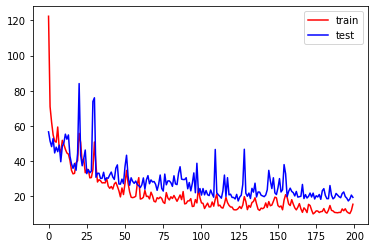

In [23]:
import matplotlib.pyplot as plt

num = np.arange(len(loss))

plt.plot(num, loss, "-", color="red", label="train")
plt.plot(num, val_loss, "-", color="blue", label="test")
plt.legend()

#### 이진분류 실습-피마인디언 데이터
- 원핫인코딩 한것
- 원핫인코딩 안 한것

In [25]:
pima = pd.read_csv("./data/pima.csv", header=None,
                  names=["임신횟수", "공복혈당", "혈압", "피부두께", 
                         "인슐린", "BMI", "가족력", "나이", "class"])
pima.head()    # csv를 cvs로 쓴 오타

,임신횟수,공복혈당,혈압,피부두께,인슐린,BMI,가족력,나이,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### (실습문제) 상관관계를 heatmap을 이용해서 표시해보기

<AxesSubplot:>

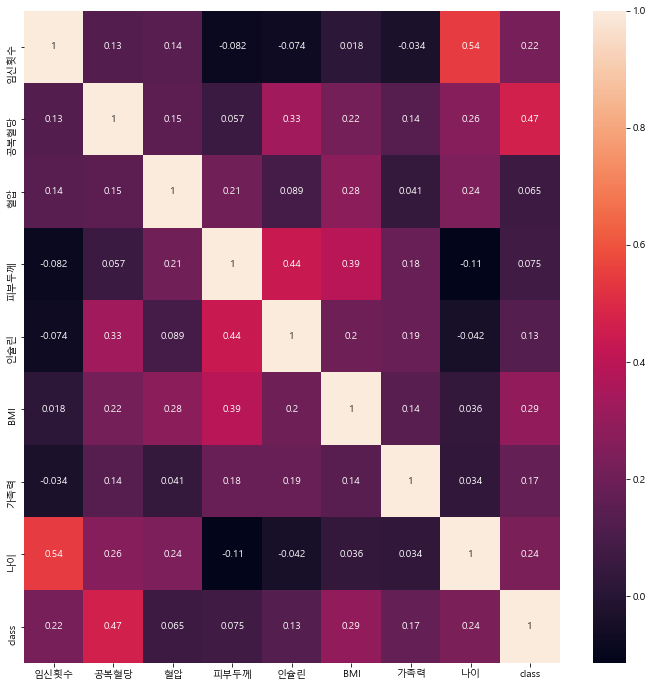

In [26]:
import seaborn as sb
from matplotlib import font_manager, rc
#밝을수록 관계가 높다
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
plt.figure(figsize=(12, 12))
sb.heatmap(pima.corr(), annot=True)

In [28]:
#X, y분리
X= pima.iloc[:,:-1]
y=pima.iloc[:,-1]
X.shape, y.shape

((768, 8), (768,))

In [29]:
#원핫잍코딩
y_en = pd.get_dummies(y)
y_en.shape

(768, 2)

In [30]:
#신경망 설계 1-원핫인코딩x
model5 = Sequential()
model5.add(Dense(units=16, input_dim=8, activation="relu"))

model5.add(Dense(units=32, activation="relu"))
model5.add(Dense(units=64, activation="relu"))
model5.add(Dense(units=32, activation="relu"))

model5.add(Dense(units=1, activation="sigmoid"))

ERROR! Session/line number was not unique in database. History logging moved to new session 225


In [31]:
#신경망 설계2 -원핫인코딩ㅇ
model6 = Sequential()

model6.add(Dense(units=16, input_dim=8, activation="relu"))

model6.add(Dense(units=32, activation="relu"))
model6.add(Dense(units=64, activation="relu"))
model6.add(Dense(units=32, activation="relu"))

model6.add(Dense(units=1, activation="softmax"))

In [ ]:
#컴파일1,2
model5.compile(loss="binary_crossentropy", optimizer = "adam", metrics=["accuarcy"])
model6.compile(loss="binary_crossentropy", optimizer = "adam", metrics=["accuarcy"])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\SM2139\anaconda3\envs\deep01\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-44e6f0ade8d0>", line 2, in <module>
    model5.compile(loss="binary_crossentropy", optimizer = "adam", metrics=["accuarcy"])
  File "C:\Users\SM2139\anaconda3\envs\deep01\lib\site-packages\tensorflow_core\python\training\tracking\base.py", line 457, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\SM2139\anaconda3\envs\deep01\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 429, in compile
    self._cache_output_metric_attributes(metrics, weighted_metrics)
  File "C:\Users\SM2139\anaconda3\envs\deep01\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 1842, in _cache_output_metric_attributes
    metrics, self.output_names, output_shapes, self.loss_functions)
  File "C:\Users\SM2

In [ ]:
#학습1,2
h5 = model5.fit()
h6 = model6.fit()

In [ ]:
#학습결과 데이터 가져오기
acc = h5.history["accuracy"]
val_loss = h5.history["val_accuracy"]
loss = h5.history["loss"]
val_loss = h5.history["val_loss"]

In [27]:
#시각화하기 1모델 (정확도)
num = np.arange(len(loss))

plt.plot(num, loss, "-", color="red", label="train")
plt.plot(num, val_loss, "-", color="blue", label="test")
plt.legend()

In [ ]:
#시각화하기 1 모델(오차)
plt.plot(num, loss, "-", color="red", label="train")
plt.plot(num, val_loss, "-", color="blue", label="test")
plt.legend()